(a) Write the problem in term of value function iteration, and briefly discuss why your iterative problem is bound to convergence to the stationary problem of equation
(1). In other words, discuss why iteration over Vj ensures converge to a unique V
(Hint: consider that consumption can not be negative)


__Answer__ 

Becuase the problem sastifies the following elements:

a) the discount factor   is time invariant ; b) the objetive function at time t is  tu(ct) and is thus the product of the discount rate and a time invariant utility function; c) the dynamic constraint is also time invariant.


In this case u(c) is b.d.d from bellow and then we can use the following theorem... 

Assuming that $\beta \in$ (0; 1) and that $ \sum_{t=0}^\infty \beta^tU(c_t)$ exists and is finite for any feasible path {a$_t$}$^{\infty}_{t=0}$ given $a_0$. Then there is a unique solution to the dynamic optimization problem. 

The previous theorem essentially restricts the admissible one-period payos to sequences that cannot grow too rapidly relatively to the discount factor.



Exercise 

(b) Assign specificc (and reasonable) values to the parameters of the model

(c) Carefully de ne the set of feasible control ~a0 for any given level of the state space.

(d) From a grid of the state space ~a, where ~a is n   1.

In [74]:
import numpy as np
import matplotlib.pyplot as plt

beta=0.9  # discount rate
gamma=0.5 # the CRRA parameter
r = 0.01

grid_min=0.00001
grid_max=1
step=100

grid=np.arange(grid_min,grid_max,step) #an evenly spaced grid from 0 to 1
grid_size=len(grid)

def U(c):
    return c**(1-gamma)/(1-gamma)      

In [75]:
# set the state space grid --> discretized 

grid_max=5
grid_size=50
grid= np.linspace(1e-6, grid_max, grid_size)

In [76]:
#inizialize value function iteration

dimIter=200

Tv=np.zeros((len(grid),dimIter)) 
for ii in range(dimIter-1):  
    aux = np.zeros((len(grid),len(grid)))-1. 
    for x in range(len(grid)):    
        
        for x_p in range(len(grid)):
            
            if grid[x]*(1+r) >= grid[x_p]: 
                
                aux[x,x_p]=U((1+r)*grid[x]-grid[x_p])+beta*Tv[x_p,ii]   
                
                
    Tv[:,ii+1]=np.amax(aux,axis=1) 

(e) Write down a python code of a value function iteration with discretization of the
state space and  nds the unique discrete approximation to

In [77]:

tol = 1e-6 
converge=0 
kk=1 
while converge==0:
    v_old=Tv[:,kk-1]  
    v_new=Tv[:,kk]    
    target=abs(max(v_new-v_old))   
    
    if target < tol: 
        
        print ("converged in", kk-1, "iteration")
        v_adda=v_old #  
        converge=1
        kkstar=kk-1
        
    else:
        kk=kk+1
        print(target) 
        
    if kk==dimIter:
        converge=2
        print("no convergence in", kk-1)  
    
#state and control variables 

aux_sig = np.zeros((len(grid),len(grid)))-1. 
for x in range(len(grid)):  
    for x_p in range(len(grid)): # second index the feasible action 
            if grid[x]*(1+r) >= grid[x_p]: 
                aux_sig[x,x_p]=U(grid[x]-grid[x_p])+beta*v_adda[x_p]    
sig_adda=np.argmax(aux_sig,axis=1)  #index max
optK_p=grid[sig_adda]

4.4944405658546644
1.5656347902391108
1.0277481986344492
0.7418628528572864
0.5565502735461187
0.4306766546120748
0.33411304425673727
0.2681925467135393
0.21181970732703448
0.1692283558765304
0.13175796729359668
0.10986027950626998
0.09090065826531024
0.07280281593824967
0.0561312307909283
0.04193487467499857
0.02648991514188559
0.013337188048192061
0.0025927599795299017
2.7017034355480973e-05
2.4315330920288147e-05
2.1883797828081697e-05
1.9695418046694613e-05
1.7725876242380423e-05
1.5953288617254202e-05
1.4357959756239325e-05
1.2922163781681206e-05
1.162994740333545e-05
1.046695266282427e-05
9.420257399028742e-06
8.47823165983641e-06
7.630408491721141e-06
6.8673676434372055e-06
6.1806308782053065e-06
5.562567791272954e-06
5.006311011968023e-06
4.5056799109488566e-06
4.055111920031607e-06
3.6496007282948995e-06
3.2846406554654095e-06
2.956176589741233e-06
2.6605589313888345e-06
2.3945030385164046e-06
2.155052735375307e-06
1.939547463081226e-06
1.7455927157072892e-06
1.571033445557645

(f) Plot the value function and the control function with respect to the state space.

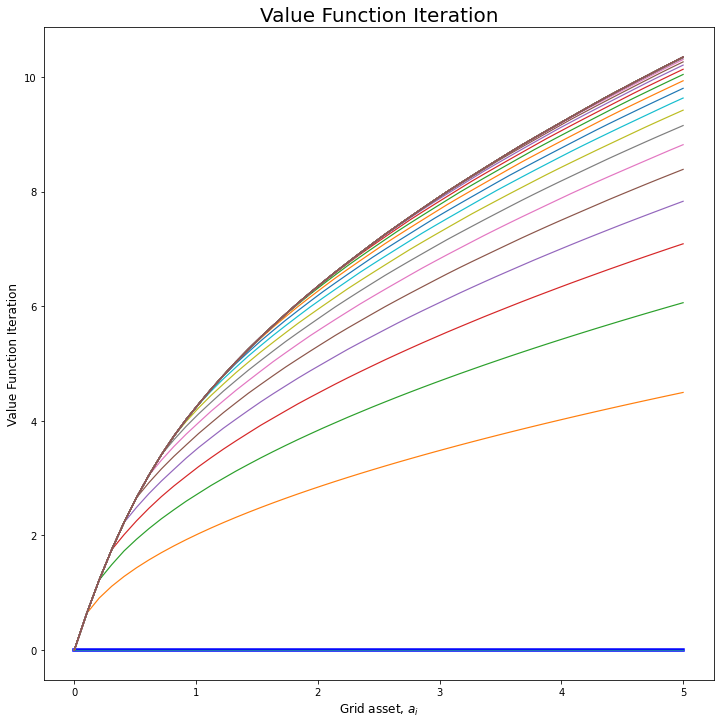

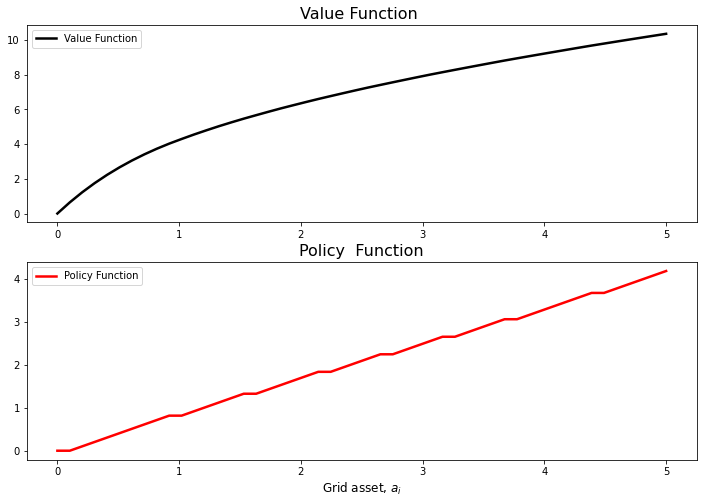

In [78]:
fig, ax = plt.subplots(figsize=(12,12))

ax.set_ylabel(r'Value Function Iteration', fontsize=12)
ax.set_xlabel(r'Grid asset, $a_i$', fontsize=12)
ax.set_title(r'Value Function Iteration', fontsize=20)
ax.plot(grid,Tv[:,0],linewidth=3.5,color="blue",  linestyle="-")

for zz in range(kkstar-5):
    ax.plot(grid,Tv[:,zz], linewidth=1.2)
    
fig, axes = plt.subplots(2, 1,figsize=(12,8) )

axes[0].plot(grid,v_adda, color="black", linewidth=2.5, linestyle="-", label=r"Value Function")
axes[0].legend(loc='upper left')
axes[0].set_title("Value Function ", fontsize=16)

axes[1].plot(grid,optK_p, color="red", linewidth=2.5, linestyle="-", label=r"Policy Function")
axes[1].legend(loc='upper left')
axes[1].set_title("Policy  Function", fontsize=16)
axes[1].set_xlabel(r'Grid asset, $a_i$', fontsize=12);

__Exercise 2__

Shooting Method: Consider the following dynamic Ramsey model. Note that this
exercise is not compulsory and it is for the bored student in search for bonus point.

$$
Max_{c_t, k_{t+1}}= \Biggr[\sum_{t=0}^{\infty} \beta^t \ \frac{c_t^{1-\gamma}}{1-\gamma} \Biggr]\\
$$

$$
k_{t+1}=k^\alpha_t - c_t \ ; \ t=0,1,2,...T
$$

$k_0$ is given

a) Set up the  nite horizon Lagrangean and take the  rst order condition, and obtain
a non linear system of 2 equations in kt; ct and a Khun-Tucker condition for the
non negative constraint.

$$
\mathcal{L}(c_t, k_{t+1},\lambda) =
\sum_{t=0}^T \beta^t \frac{c_t^{1-\gamma}}{1-\gamma} + \sum_{t=0}^T \lambda_t
\left(k_t^\alpha - c_t - k_{t+1} \right)
$$


\begin{equation}
  \left\{
    \begin{aligned}
      & \beta^tc^{-\gamma}=\lambda_t\\
      & -\lambda_t + \lambda_{t+1} \alpha k_{t+1}^{\alpha -1 } = 0\\
      & k_t^\gamma - c_t - k_{t+1} = 0 \\
      & \lambda_T k_{t+1} = 0 \rightarrow Karush-Kuhn \ Tucker\  Conditions \ (non \  negativity \ of \ the \ constraint \ and \ terminal \ condition ) 
    \end{aligned}\\
  \right.
\end{equation}

\begin{equation}
  \left\{
    \begin{aligned}
      & \beta^tc^{-\gamma}=\lambda_t\\
      & \alpha k_{t+1}^{\alpha-1}=\frac{\beta^t c^{-\alpha}}{\beta^{t+1}c_{t+1}^{\gamma}}\\
      & k_t^\alpha - c_t = k_{t+1}  \\
      & \lambda_T k_{t+1} = 0 
    \end{aligned}\\
  \right.
\end{equation}

\begin{equation}
  \left\{
    \begin{aligned}
          & c_{t+1}^{-\gamma} = \frac{c_t^{-\gamma}}{ \beta \alpha k_{t+1}^{\alpha -1} }\\
      &  k_t^\alpha - c_t = k_{t+1} \\
      & \lambda_T k_{t+1} = 0 
    \end{aligned}\\
  \right.
\end{equation}

\begin{equation}
  \left\{
    \begin{aligned}
      &  c_{t+1}=c_t(\alpha \beta k_{t+1}^{\alpha-1})^{\frac{1}{\gamma}}\\
      &  k_t^\alpha - c_t = k_{t+1} \\
      & \lambda_T k_{t+1} = 0 
    \end{aligned}\\
  \right.
\end{equation}


__In this exercise we use the code present in QuantEco. They used a a more complex model that the model in the exercise, howewer assuming full depreciation capital and a productivity equal to 1 (A=1) the dynamics of accumulation of capital are the same that those ones we have in the exercise.__

Assume   = 0:33,   = 0:98, 
 = :5, and write a Python Code for solving the
system of di erence equation with the Shooting method when T = 50; T = 60; ::::.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (11, 5)  #set default figure size
from numba import njit, float64
from numba.experimental import jitclass
import numpy as np

In [2]:
planning_data = [
    ('γ', float64),    # Coefficient of relative risk aversion
    ('β', float64),    # Discount factor
    ('δ', float64),    # Depreciation rate on capital
    ('α', float64),    # Return to capital per capita
    ('A', float64)     # Technology
]

In [3]:
@jitclass(planning_data)
class PlanningProblem():

    def __init__(self, γ=0.5, β=0.98, δ=1, α=0.33, A=1):

        self.γ, self.β = γ, β
        self.δ, self.α, self.A = δ, α, A

    def u(self, c):
        '''
        Utility function
        ASIDE: If you have a utility function that is hard to solve by hand
        you can use automatic or symbolic differentiation
        See https://github.com/HIPS/autograd
        '''
        γ = self.γ

        return c ** (1 - γ) / (1 - γ) if γ!= 1 else np.log(c)

    def u_prime(self, c):
        'Derivative of utility'
        γ = self.γ

        return c ** (-γ)

    def u_prime_inv(self, c):
        'Inverse of derivative of utility'
        γ = self.γ

        return c ** (-1 / γ)

    def f(self, k):
        'Production function'
        α, A = self.α, self.A

        return A * k ** α

    def f_prime(self, k):
        'Derivative of production function'
        α, A = self.α, self.A

        return α * A * k ** (α - 1)

    def f_prime_inv(self, k):
        'Inverse of derivative of production function'
        α, A = self.α, self.A

        return (k / (A * α)) ** (1 / (α - 1))

    def next_k_c(self, k, c):
        ''''
        Given the current capital Kt and an arbitrary feasible
        consumption choice Ct, computes Kt+1 by state transition law
        and optimal Ct+1 by Euler equation.
        '''
        β, δ = self.β, self.δ
        u_prime, u_prime_inv = self.u_prime, self.u_prime_inv
        f, f_prime = self.f, self.f_prime

        k_next = f(k) + (1 - δ) * k - c
        c_next = u_prime_inv(u_prime(c) / (β * (f_prime(k_next) + (1 - δ))))

        return k_next, c_next
    
pp = PlanningProblem() #this is necessary to construc our economy 

In [4]:
@njit
def shooting(pp, c0, k0, T=10):
    '''
    Given the initial condition of capital k0 and an initial guess
    of consumption c0, computes the whole paths of c and k
    using the state transition law and Euler equation for T periods.
    '''
    if c0 > pp.f(k0):
        print("initial consumption is not feasible")

        return None

    # initialize vectors of c and k
    c_vec = np.empty(T+1)
    k_vec = np.empty(T+2)

    c_vec[0] = c0
    k_vec[0] = k0

    for t in range(T):
        k_vec[t+1], c_vec[t+1] = pp.next_k_c(k_vec[t], c_vec[t])

    k_vec[T+1] = pp.f(k_vec[T]) + (1 - pp.δ) * k_vec[T] - c_vec[T]

    return c_vec, k_vec

In [83]:
#we start with initical quantities of c and k 

paths = shooting(pp, 0.2, 0.3, T=50) 

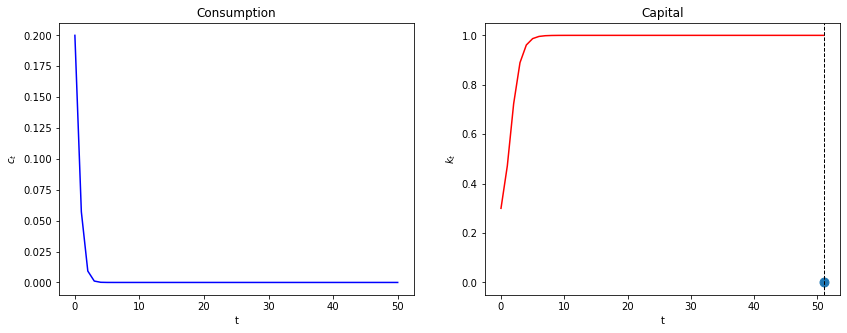

In [84]:
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

colors = ['blue', 'red']
titles = ['Consumption', 'Capital']
ylabels = ['$c_t$', '$k_t$']

T = paths[0].size - 1
for i in range(2):
    axs[i].plot(paths[i], c=colors[i])
    axs[i].set(xlabel='t', ylabel=ylabels[i], title=titles[i])

axs[1].scatter(T+1, 0, s=80)
axs[1].axvline(T+1, color='k', ls='--', lw=1)

plt.show()

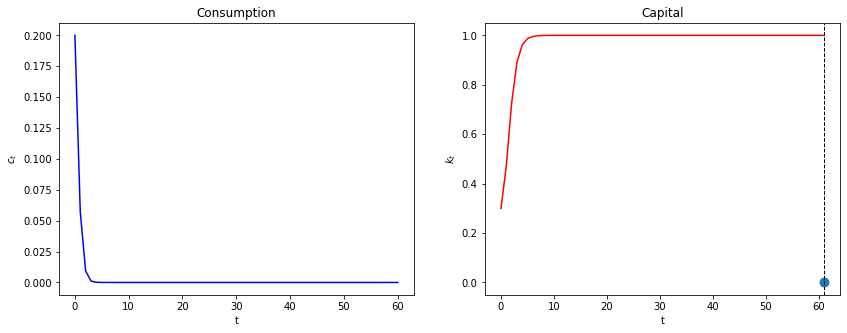

In [85]:
paths = shooting(pp, 0.2, 0.3, T=60) 

fig, axs = plt.subplots(1, 2, figsize=(14, 5))

colors = ['blue', 'red']
titles = ['Consumption', 'Capital']
ylabels = ['$c_t$', '$k_t$']

T = paths[0].size - 1
for i in range(2):
    axs[i].plot(paths[i], c=colors[i])
    axs[i].set(xlabel='t', ylabel=ylabels[i], title=titles[i])

axs[1].scatter(T+1, 0, s=80)
axs[1].axvline(T+1, color='k', ls='--', lw=1)

plt.show()

(c) Obtain the steady-state version of the infinite horizon problem numerically.

In [8]:
# steady state of capital
ρ = 1 / pp.β - 1
k_ss = pp.f_prime_inv(ρ+pp.δ)

# steady state of saving rate
s_ss = pp.δ * k_ss / pp.f(k_ss)

print(f'steady state for saving rate is: {s_ss}')

print(f'steady state for capital is: {k_ss}')

steady state for saving rate is: 0.3234
steady state for capital is: 0.18546786812182883


(d) Check whether the solution in point a) converges to the steady state capital and
the steady state saving rate.

In [9]:
@njit
def bisection(pp, c0, k0, T=10, tol=1e-4, max_iter=500, k_ter=0, verbose=True):

    # initial boundaries for guess c0
    c0_upper = pp.f(k0)
    c0_lower = 0

    i = 0
    while True:
        c_vec, k_vec = shooting(pp, c0, k0, T)
        error = k_vec[-1] - k_ter

        # check if the terminal condition is satisfied
        if np.abs(error) < tol:
            if verbose:
                print('Converged successfully on iteration ', i+1)
            return c_vec, k_vec

        i += 1
        if i == max_iter:
            if verbose:
                print('Convergence failed.')
            return c_vec, k_vec

        # if iteration continues, updates boundaries and guess of c0
        if error > 0:
            c0_lower = c0
        else:
            c0_upper = c0

        c0 = (c0_lower + c0_upper) / 2

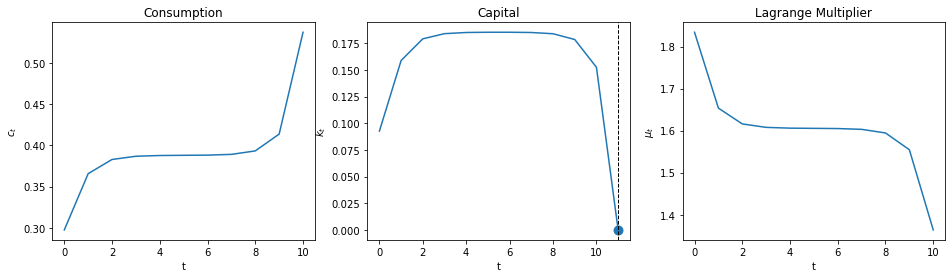

In [87]:
def plot_paths(pp, c0, k0, T_arr, k_ter=0, k_ss=None, axs=None):

    if axs is None:
        fix, axs = plt.subplots(1, 3, figsize=(16, 4))
    ylabels = ['$c_t$', '$k_t$', '$\mu_t$']
    titles = ['Consumption', 'Capital', 'Lagrange Multiplier']

    c_paths = []
    k_paths = []
    for T in T_arr:
        c_vec, k_vec = bisection(pp, c0, k0, T, k_ter=k_ter, verbose=False)
        c_paths.append(c_vec)
        k_paths.append(k_vec)

        μ_vec = pp.u_prime(c_vec)
        paths = [c_vec, k_vec, μ_vec]

        for i in range(3):
            axs[i].plot(paths[i])
            axs[i].set(xlabel='t', ylabel=ylabels[i], title=titles[i])

        # Plot steady state value of capital
        if k_ss is not None:
            axs[1].axhline(k_ss, c='k', ls='--', lw=1)

        axs[1].axvline(T+1, c='k', ls='--', lw=1)
        axs[1].scatter(T+1, paths[1][-1], s=80)

    return c_paths, k_paths

plot_paths(pp, 0.3, k_ss/2, [10]);

(d) Check whether the solution in point a) converges to the steady state capital and
the steady state saving rate.

In [11]:
@njit
def saving_rate(pp, c_path, k_path):
    'Given paths of c and k, computes the path of saving rate.'
    production = pp.f(k_path[:-1])

    return (production - c_path) / production

def plot_saving_rate(pp, c0, k0, T_arr, k_ter=0, k_ss=None, s_ss=None):

    fix, axs = plt.subplots(2, 2, figsize=(12, 9))

    c_paths, k_paths = plot_paths(pp, c0, k0, T_arr, k_ter=k_ter, k_ss=k_ss, axs=axs.flatten())

    for i, T in enumerate(T_arr):
        s_path = saving_rate(pp, c_paths[i], k_paths[i])
        axs[1, 1].plot(s_path)

    axs[1, 1].set(xlabel='t', ylabel='$s_t$', title='Saving rate')

    if s_ss is not None:
        axs[1, 1].hlines(s_ss, 0, np.max(T_arr), linestyle='--')



Now we check where the solutions converges to the steady states in capital and saving rate

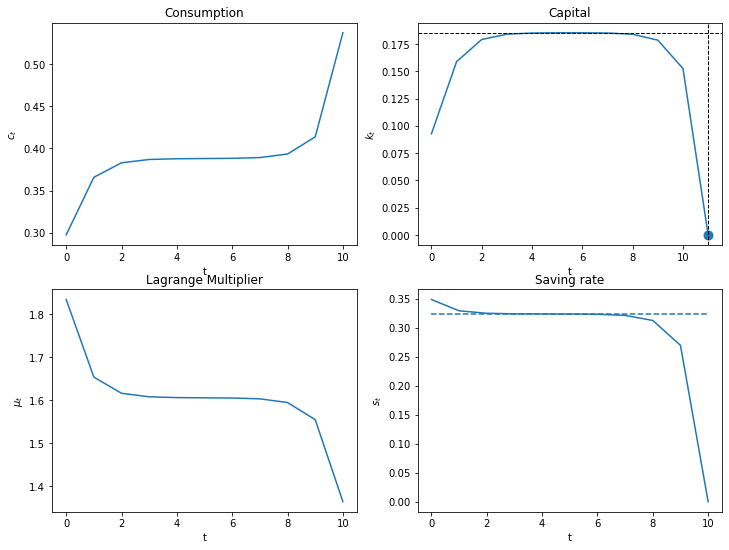

In [86]:
# steady state of saving rate
plot_saving_rate(pp, 0.3, k_ss/2, [10], k_ter=0, k_ss=k_ss, s_ss=s_ss)

as is easy to see both saving rate and capital converges. 